In [ ]:
high_reso='/content/drive/MyDrive/dataset/raw_data'

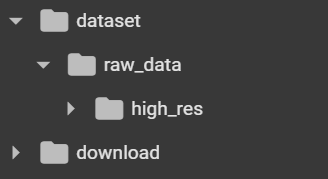

In [ ]:
import cv2
import os

# Define the input directory and output directory
input_dir = '/content/drive/MyDrive/dataset/raw_data/high_res'
output_dir = '/content/drive/MyDrive/dataset/raw_data/low_res'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Loop through all the files in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        # Full path of the input image
        input_path = os.path.join(input_dir, filename)

        # Read the high-resolution image
        high_res_image = cv2.imread(input_path)

        # Get the original dimensions
        height, width = high_res_image.shape[:2]

        # First, reduce the resolution using bicubic interpolation
        low_res_image = cv2.resize(
            high_res_image, (width // 2, height // 2), interpolation=cv2.INTER_CUBIC
        )

        # Apply Gaussian blur for additional blurring effect
        blurred_image = cv2.GaussianBlur(low_res_image, (5, 5), 0)

        # Full path of the output image
        output_path = os.path.join(output_dir, filename)

        # Save the blurred low-resolution image
        cv2.imwrite(output_path, blurred_image)

print(f"Blurred low-resolution images saved in: {output_dir}")

Blurred low-resolution images saved in: /content/drive/MyDrive/dataset/raw_data/low_res


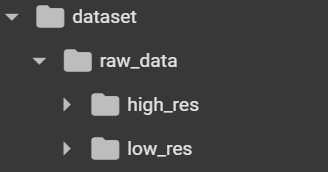

In [ ]:
import os
import shutil
import random

# Define paths
raw_data_dir = '/content/drive/MyDrive/dataset/raw_data'
train_dir = '/content/drive/MyDrive/dataset/train'
val_dir = '/content/drive/MyDrive/dataset/val'

# Create train and val directories with subfolders for high and low resolution
os.makedirs(os.path.join(train_dir, 'high_res'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'low_res'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'high_res'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'low_res'), exist_ok=True)

# Get file lists from raw data folders
high_res_files = [f for f in os.listdir(os.path.join(raw_data_dir, 'high_res')) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
low_res_files = [f for f in os.listdir(os.path.join(raw_data_dir, 'low_res')) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

# Shuffle files to ensure randomness
random.seed(42)  # For reproducibility
random.shuffle(high_res_files)
random.shuffle(low_res_files)

# Split into train and validation sets
train_high_res = high_res_files[:685]
val_high_res = high_res_files[685:]
train_low_res = low_res_files[:685]
val_low_res = low_res_files[685:]

# Copy files to train and val folders
for file in train_high_res:
    shutil.copy(os.path.join(raw_data_dir, 'high_res', file), os.path.join(train_dir, 'high_res', file))

for file in val_high_res:
    shutil.copy(os.path.join(raw_data_dir, 'high_res', file), os.path.join(val_dir, 'high_res', file))

for file in train_low_res:
    shutil.copy(os.path.join(raw_data_dir, 'low_res', file), os.path.join(train_dir, 'low_res', file))

for file in val_low_res:
    shutil.copy(os.path.join(raw_data_dir, 'low_res', file), os.path.join(val_dir, 'low_res', file))

print(f"Data successfully split into Train and Val folders.")

Data successfully split into Train and Val folders.


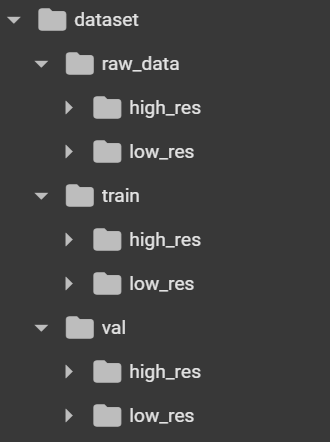